# **ESCUELA POLITECNICA NACIONAL**
- **Nombre:** Moisés Pineda
- **Curso:** GR1CC
- **Fecha:** 15/07/2025

## **Respositorio:** https://github.com/SantiagoTmg/Metodos_Numericos_GRCC1/tree/main/Tareas/%5BTarea%2009%5D%20Ejercicios%20Unidad%2004-A-B%20%20Eliminaci%C3%B3n%20gaussiana%20vs%20Gauss-Jordan

## CONJUNTO DE EJERCICIOS. -

### 1. Para cada uno de los siguientes sistemas lineales, obtenga, de ser posible, una solución con métodos gráficos. Explique los resultados desde un punto de vista geométrico.

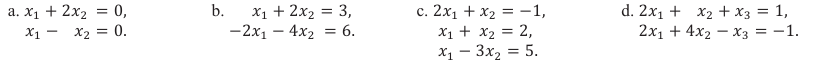

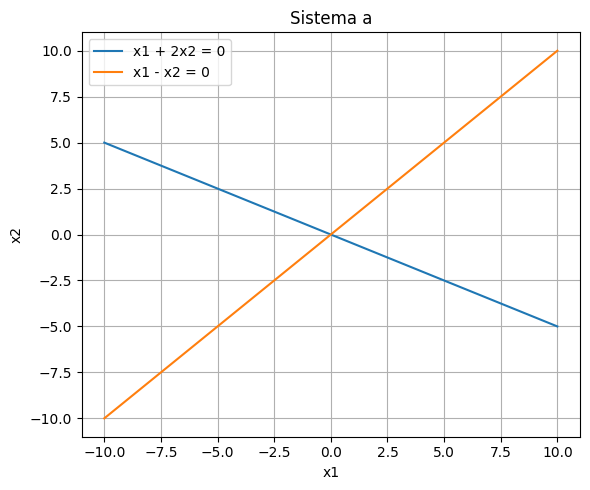

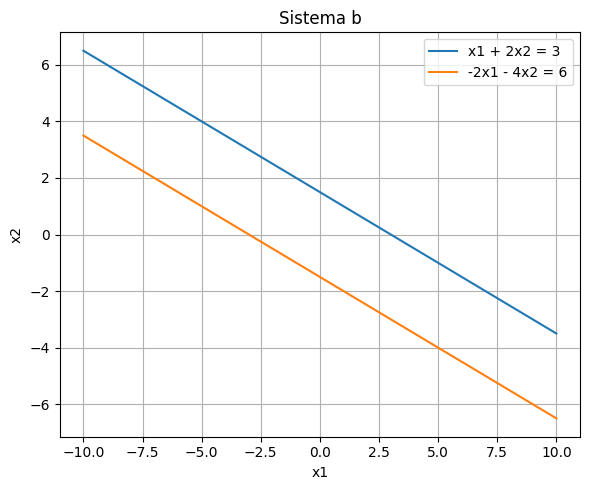

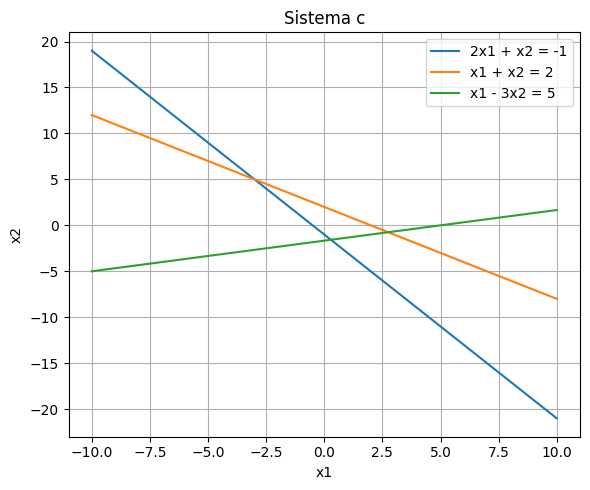

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Rango para x1
x1 = np.linspace(-10, 10, 400)

# a) Sistema a
x2_a1 = (-x1)/2           # x1 + 2x2 = 0
x2_a2 = x1                # x1 - x2 = 0

plt.figure(figsize=(6, 5))
plt.plot(x1, x2_a1, label='x1 + 2x2 = 0')
plt.plot(x1, x2_a2, label='x1 - x2 = 0')
plt.title('Sistema a')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# b) Sistema b
x2_b1 = (3 - x1)/2        # x1 + 2x2 = 3
x2_b2 = (6 + 2*x1)/(-4)     # -2x1 - 4x2 = 6

plt.figure(figsize=(6, 5))
plt.plot(x1, x2_b1, label='x1 + 2x2 = 3')
plt.plot(x1, x2_b2, label='-2x1 - 4x2 = 6')
plt.title('Sistema b')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# c) Sistema c
x2_c1 = -1 - 2*x1         # 2x1 + x2 = -1
x2_c2 = 2 - x1            # x1 + x2 = 2
x2_c3 = (-x1 + 5)/(-3)    # x1 - 3x2 = 5

plt.figure(figsize=(6, 5))
plt.plot(x1, x2_c1, label='2x1 + x2 = -1')
plt.plot(x1, x2_c2, label='x1 + x2 = 2')
plt.plot(x1, x2_c3, label='x1 - 3x2 = 5')
plt.title('Sistema c')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


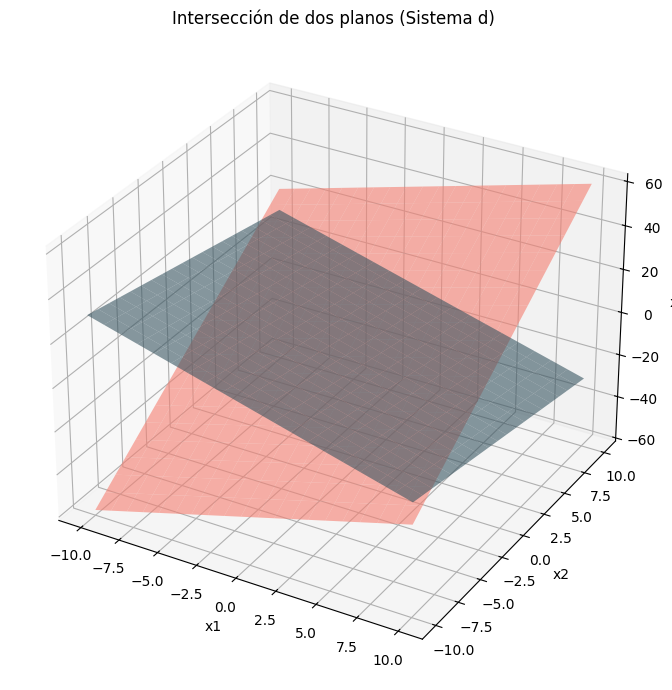

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Crear mallas para x1 y x2
x1_vals = np.linspace(-10, 10, 20)
x2_vals = np.linspace(-10, 10, 20)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Ecuación 1: 2x1 + x2 + x3 = 1 → despejamos x3
X3_1 = 1 - 2*X1 - X2

# Ecuación 2: 2x1 + 4x2 - x3 = -1 → despejamos x3
X3_2 = 2*X1 + 4*X2 + 1

# Graficar
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X1, X2, X3_1, alpha=0.6, color='skyblue', label='Plano 1')
ax.plot_surface(X1, X2, X3_2, alpha=0.6, color='salmon', label='Plano 2')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('Intersección de dos planos (Sistema d)')
plt.tight_layout()
plt.show()

### 2. Utilice la eliminación gaussiana con sustitución hacia atrás y aritmética de redondeo de dos dígitos para resolver los siguientes sistemas lineales. No reordene las ecuaciones. (La solución exacta para cada sistema es $x_1=-1$, $x_2=2$, $x_3=3$.)

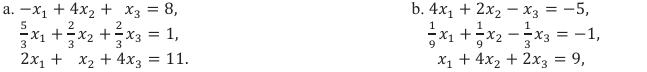

In [14]:
def gaussian_elimination(A, b):
    n = len(b)
    A = np.hstack((A, b.reshape(-1, 1)))  # Matriz aumentada

    # Eliminación hacia adelante (sin redondeo en factor)
    for i in range(n):
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]

    # Sustitución hacia atrás con redondeo final
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (A[i, -1] - np.dot(A[i, i + 1:n], x[i + 1:])) / A[i, i]

    return np.round(x, 2)  # Redondeo aquí

def main():
    # Sistema a
    A_a = np.array([
        [-1, 4, 1],
        [5/3, 2/3, 2/3],
        [2, 1, 4]
    ])
    b_a = np.array([8, 1, 11])

    solution_a = gaussian_elimination(A_a, b_a)
    print("Solución del sistema a:", solution_a)

    # Sistema b
    A_b = np.array([
        [4, 2, -1],
        [1/9, 1/9, -1/3],
        [1, 4, 2]
    ])
    b_b = np.array([-5, -1, 9])

    solution_b = gaussian_elimination(A_b, b_b)
    print("Solución del sistema b:", solution_b)

if __name__ == "__main__":
    main()

Solución del sistema a: [-1.  1.  3.]
Solución del sistema b: [-1.  1.  3.]


### 3. Utilice el algoritmo de eliminación gaussiana para resolver, de ser posible, los siguientes sistemas lineales, y determine si se necesitan intercambios de fila:

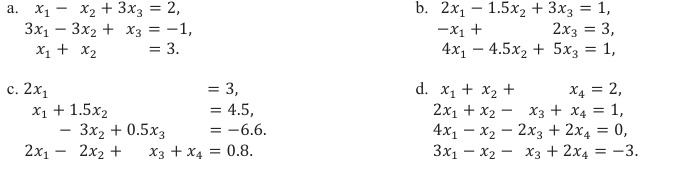

In [15]:
def gaussian_elimination_with_pivoting(A, b):

    n = len(b)
    A = A.astype(float)  # Asegurarse de que la matriz sea de tipo float
    b = b.astype(float)
    A = np.hstack((A, b.reshape(-1, 1)))  # Matriz aumentada
    swaps = []

    # Eliminación hacia adelante con pivoteo parcial
    for i in range(n):
        # Pivoteo parcial
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            swaps.append(f"Intercambio de fila {i} con fila {max_row}")

        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (A[i, -1] - np.dot(A[i, i + 1:n], x[i + 1:])) / A[i, i]

    return x, swaps

def main():
    # Sistema a
    A_a = np.array([
        [1, -1, 3],
        [3, -3, 1],
        [1, 1, 0]
    ])
    b_a = np.array([2, -1, 3])

    solution_a, swaps_a = gaussian_elimination_with_pivoting(A_a, b_a)
    print("Sistema a:")
    print("Solución:", solution_a)
    print("Intercambios:", swaps_a)

    # Sistema b
    A_b = np.array([
        [2, -1.5, 3],
        [-1, 0, 2],
        [4, -4.5, 5]
    ])
    b_b = np.array([1, 3, 1])

    solution_b, swaps_b = gaussian_elimination_with_pivoting(A_b, b_b)
    print("\nSistema b:")
    print("Solución:", solution_b)
    print("Intercambios:", swaps_b)

    # Sistema c
    A_c = np.array([
        [2, 0, 0, 0],
        [1, 1.5, 0, 0],
        [-3, 0, 0.5, 0],
        [2, -2, 1, 1]
    ])
    b_c = np.array([3, 4.5, -6.6, 0.8])

    solution_c, swaps_c = gaussian_elimination_with_pivoting(A_c, b_c)
    print("\nSistema c:")
    print("Solución:", solution_c)
    print("Intercambios:", swaps_c)

    # Sistema d
    A_d = np.array([
        [1, 1, 0, 1],
        [2, 1, -1, 1],
        [4, -2, -2, 2],
        [3, -1, -1, 2]
    ])
    b_d = np.array([2, 1, 0, -3])

    solution_d, swaps_d = gaussian_elimination_with_pivoting(A_d, b_d)
    print("\nSistema d:")
    print("Solución:", solution_d)
    print("Intercambios:", swaps_d)

if __name__ == "__main__":
    main()

Sistema a:
Solución: [1.1875 1.8125 0.875 ]
Intercambios: ['Intercambio de fila 0 con fila 1', 'Intercambio de fila 1 con fila 2']

Sistema b:
Solución: [-1. -0.  1.]
Intercambios: ['Intercambio de fila 0 con fila 2']

Sistema c:
Solución: [ 1.5  2.  -4.2  6. ]
Intercambios: ['Intercambio de fila 0 con fila 2', 'Intercambio de fila 1 con fila 3', 'Intercambio de fila 2 con fila 3']

Sistema d:
Solución: [ nan  nan  inf -inf]
Intercambios: ['Intercambio de fila 0 con fila 2']


C:\Users\santi\AppData\Local\Temp\ipykernel_19696\2281164595.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  x[i] = (A[i, -1] - np.dot(A[i, i + 1:n], x[i + 1:])) / A[i, i]


### 4. Use el algoritmo de eliminación gaussiana y la aritmética computacional de precisión de 32 bits para resolver los siguientes sistemas lineales.

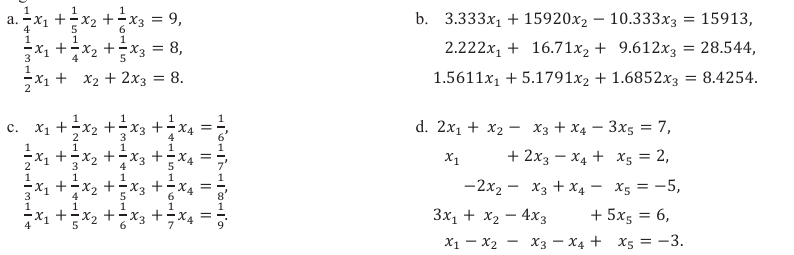

In [17]:
def gaussian_elimination(matrix, vector):
    A = np.array(matrix, dtype=np.float64)
    b = np.array(vector, dtype=np.float64)

    n = len(b)

    # Eliminación hacia adelante con pivoteo parcial
    for i in range(n):
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if i != max_row:
            A[[i, max_row]] = A[[max_row, i]]
            b[[i, max_row]] = b[[max_row, i]]

        pivot = A[i, i]
        if np.isclose(pivot, 0):
            raise ValueError("Sistema singular o sin solución única.")

        for j in range(i + 1, n):
            factor = A[j, i] / pivot
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    return np.round(x, 6)  # Ajusta la precisión final si lo deseas


# Ejemplo de sistemas de la imagen
systems = [
    {"matrix": [[1/4, 1/5, 1/6], [1/3, 1/4, 1/5], [1/2, 1, 2]], "vector": [9, 8, 8]},
    {"matrix": [[3.333, 15920, -10.333], [2.222, 16.71, 9.612], [1.5611, 5.1791, 1.6852]], "vector": [15913, 28.544, 8.4254]},
    {"matrix": [[1, 1/2, 1/3, 1/4], [1/2, 1/3, 1/4, 1/5], [1/3, 1/4, 1/5, 1/6], [1/4, 1/5, 1/6, 1/7]], "vector": [1/5, 1/6, 1/7, 1/9]},
    {"matrix": [[2, 1, -1, -3, -3], [1, 0, 2, -1, -4], [-2, 0, -3, 4, -5], [3, 1, 2, -4, 5], [1, -1, -3, -4, -1]], "vector": [7, 2, -5, 6, -3]}
]

# Resolver cada sistema
for idx, system in enumerate(systems):
    print(f"\nSistema {chr(97 + idx)}:")
    try:
        solution = gaussian_elimination(system["matrix"], system["vector"])
        print("Solución:", solution)
    except ValueError as e:
        print(e)


Sistema a:
Solución: [-227.076923  476.923077 -177.692308]

Sistema b:
Solución: [1. 1. 1.]

Sistema c:
Solución: [  1.930159 -23.047619  57.047619 -36.888889]

Sistema d:
Solución: [-5.538462  7.846154  1.307692 -3.487179 -0.358974]


### 5. Dado el sistema lineal:

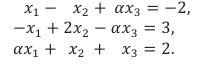

- a. Encuentre el valor(es) de 𝛼 para los que el sistema no tiene soluciones.
- b. Encuentre el valor(es) de 𝛼 para los que el sistema tiene un número infinito de soluciones.
- c. Suponga que existe una única solución para una a determinada, encuentre la solución.

In [20]:
def analyze_system(alpha):
    # Construye matriz del sistema en función de α
    A = np.array([
        [1, -1, alpha],
        [-1, 2, -alpha],
        [alpha, 1, 1]
    ], dtype=np.float64)
    b = np.array([-2, 3, 2], dtype=np.float64)

    # Determinante para saber si tiene solución única
    det = np.linalg.det(A)

    if np.isclose(det, 0):
        # Verificamos los rangos
        augmented = np.column_stack((A, b))
        rank_A = np.linalg.matrix_rank(A)
        rank_aug = np.linalg.matrix_rank(augmented)

        if rank_A == rank_aug:
            return "Infinitas soluciones"
        else:
            return "No tiene solución"
    else:
        # Solución única
        x = np.linalg.solve(A, b)
        return np.round(x, 4)

# Análisis para varios valores de α
alphas_to_test = [0, -1, -2, 1, 2, 3]
for alpha in alphas_to_test:
    result = analyze_system(alpha)
    print(f"Para α = {alpha}, el resultado es: {result}")


Para α = 0, el resultado es: [-1.  1.  1.]
Para α = -1, el resultado es: Infinitas soluciones
Para α = -2, el resultado es: [-0.3333  1.      0.3333]
Para α = 1, el resultado es: No tiene solución
Para α = 2, el resultado es: [ 1.  1. -1.]
Para α = 3, el resultado es: [ 0.5  1.  -0.5]


In [31]:
def analizar_sistema(a):
    # Matriz de coeficientes
    A = np.array([
        [1, -1, a],
        [-1, 2, -a],
        [a, 1, 1]
    ], dtype=float)

    # Vector independiente
    b = np.array([-2, 3, 2], dtype=float)

    # Determinante
    det_A = np.linalg.det(A)

    if np.isclose(det_A, 0):
        # Verificamos los rangos
        rA = np.linalg.matrix_rank(A)
        Ab = np.column_stack((A, b))
        rAb = np.linalg.matrix_rank(Ab)

        if rA == rAb:
            return f"Para a = {a:.2f}: Infinitas soluciones"
        else:
            return f"Para a = {a:.2f}: No tiene solución"
    else:
        # Solución única
        x = np.linalg.solve(A, b)
        return f"Para a = {a:.2f}: Solución única → x = {np.round(x, 3)}"

# Probar varios valores de a
valores_a = [-2, -1, 0, 0.5, 1, 2]
for a in valores_a:
    print(analizar_sistema(a))

Para a = -2.00: Solución única → x = [-0.333  1.     0.333]
Para a = -1.00: Infinitas soluciones
Para a = 0.00: Solución única → x = [-1.  1.  1.]
Para a = 0.50: Solución única → x = [-2.  1.  2.]
Para a = 1.00: No tiene solución
Para a = 2.00: Solución única → x = [ 1.  1. -1.]


## EJERCICIOS APLICADOS

### 6. Suponga que en un sistema biológico existen n especies de animales y m fuentes de alimento. Si $x_j$ representa la población de las j-ésimas especies, para cada 𝑗 = 1, ⋯ , 𝑛; $b_i$; representa el suministro diario disponible del i-ésimo alimento y $a_{ij}$ representa la cantidad del i-ésimo alimento.
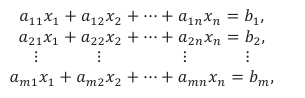
### representa un equilibrio donde existe un suministro diario de alimento para cumplir con precisión con el promedio diario de consumo de cada especie.

- a. Si

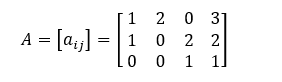

$x=(x_j)=[1000,500,350,400],$ y $b=(b_i)=[3500,2700,900].$ ¿Existe suficiente alimento para satisfacer el consumo promedio diario?

In [21]:
from scipy.optimize import linprog

def is_food_sufficient(A, x, b):
    consumption = np.dot(A, x)
    return np.all(consumption <= b), consumption

A_food = np.array([
    [1, 2, 0, 3],
    [1, 0, 2, 2],
    [0, 0, 1, 1]
], dtype=float)

x_food = np.array([1000, 500, 350, 400], dtype=float)
b_food = np.array([3500, 2700, 900], dtype=float)

sufficient, consumption = is_food_sufficient(A_food, x_food, b_food)
print("¿Hay suficiente alimento para satisfacer el consumo promedio diario?", sufficient)
print("Consumo calculado:", consumption)
print("Suministro disponible:", b_food)

¿Hay suficiente alimento para satisfacer el consumo promedio diario? True
Consumo calculado: [3200. 2500.  750.]
Suministro disponible: [3500. 2700.  900.]


- b. ¿Cuál es el número máximo de animales de cada especie que se podría agregar de forma individual al sistema con el suministro de alimento que cumpla con el consumo?

- c. Si la especie 1 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

- d. Si la especie 2 se extingue, ¿qué cantidad de incremento individual de las especies restantes se podría soportar?

In [30]:
def calcular_incrementos_individuales(A, x, b):
    A = np.array(A, dtype=float)
    x = np.array(x, dtype=float)
    b = np.array(b, dtype=float)

    incrementos = []
    consumo_actual = A @ x
    disponible = b - consumo_actual

    for j in range(len(x)):
        a_col = A[:, j]
        # Detectamos si alguna entrada de a_col es cero
        with np.errstate(divide='ignore', invalid='ignore'):
            delta = np.where(np.abs(a_col) > 1e-8, disponible / a_col, np.inf)

        # Solo consideramos los límites válidos
        delta_valido = delta[np.isfinite(delta)]
        if len(delta_valido) > 0:
            incremento_max = np.floor(np.min(delta_valido))
        else:
            incremento_max = 0  # No se puede agregar esa especie

        incrementos.append(int(incremento_max))

    return incrementos

# Datos originales
A = [
    [1, 2, 0, 3],
    [1, 0, 2, 2],
    [0, 0, 1, 1]
]
x = [1000, 500, 350, 400]
b = [3500, 2700, 900]

# Literal b
print("🔹 Incrementos individuales permitidos:")
print(calcular_incrementos_individuales(A, x, b))

# Literal c: especie 1 extinta
A_c = [row[1:] for row in A]  # quitar primera columna
x_c = x[1:]
b_c = np.array(b) - np.array([row[0] for row in A]) * x[0]

print("🔹 Incrementos si especie 1 se extingue:")
print(calcular_incrementos_individuales(A_c, x_c, b_c))

# Literal d: especie 2 extinta
A_d = [row[:1] + row[2:] for row in A]  # quitar segunda columna
x_d = [x[0]] + x[2:]
b_d = np.array(b) - np.array([row[1] for row in A]) * x[1]

print("🔹 Incrementos si especie 2 se extingue:")
print(calcular_incrementos_individuales(A_d, x_d, b_d))



🔹 Incrementos individuales permitidos:
[200, 150, 100, 100]
🔹 Incrementos si especie 1 se extingue:
[150, 100, 100]
🔹 Incrementos si especie 2 se extingue:
[200, 100, 100]


## EJERCICIOS TEÓRICOS

### 7. Repita el ejercicio 4 con el método Gauss-Jordan.

In [26]:
def gauss_jordan(A, b):
    """
    Resuelve un sistema de ecuaciones lineales Ax = b usando el método Gauss-Jordan.
    """
    A = A.astype(np.float32)
    b = b.astype(np.float32)
    n = len(b)
    
    # Formar la matriz aumentada
    aug_matrix = np.hstack((A, b.reshape(-1, 1)))

    for i in range(n):
        # Hacer el pivote igual a 1 dividiendo toda la fila
        aug_matrix[i] = aug_matrix[i] / aug_matrix[i, i]

        # Hacer ceros en la columna del pivote para las demás filas
        for j in range(n):
            if i != j:
                aug_matrix[j] -= aug_matrix[j, i] * aug_matrix[i]

    # Extraer la solución
    x = aug_matrix[:, -1]
    return x

# Sistemas de ecuaciones del ejercicio
# Sistema (a)
A_a = np.array([
    [1/4, 1/5, 1/6],
    [1/3, 1/4, 1/5],
    [1/2, 1, 1]
], dtype=np.float32)
b_a = np.array([9, 8, 8], dtype=np.float32)

# Sistema (b)
A_b = np.array([
    [3.333, 15920, 10.333],
    [2.222, 16.71, 9.612],
    [1.5611, 5.1791, 1.6852]
], dtype=np.float32)
b_b = np.array([15913, 28.544, 8.4254], dtype=np.float32)

# Sistema (c)
A_c = np.array([
    [1, 1/2, 1/3, 1/4],
    [1/2, 1/3, 1/4, 1/5],
    [1/3, 1/4, 1/5, 1/6],
    [1/4, 1/5, 1/6, 1/7]
], dtype=np.float32)
b_c = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)

# Sistema (d)
A_d = np.array([
    [2, 1, -1, 1, -3],
    [1, 2, -3, -4, 0],
    [-2, -2, -3, 4, -5],
    [3, 1, -2, -4, 5],
    [1, -1, -3, -4, 1]
], dtype=np.float32)
b_d = np.array([7, 2, -5, 6, -3], dtype=np.float32)

# Resolver cada sistema
x_a = gauss_jordan(A_a, b_a)
x_b = gauss_jordan(A_b, b_b)
x_c = gauss_jordan(A_c, b_c)
x_d = gauss_jordan(A_d, b_d)

# Mostrar resultados
print("Solución del sistema (a):", x_a)
print("Solución del sistema (b):", x_b)
print("Solución del sistema (c):", x_c)
print("Solución del sistema (d):", x_d)

Solución del sistema (a): [  306.00003 -1300.0002   1155.0002 ]
Solución del sistema (b): [1.0023832  0.99870026 1.0017889 ]
Solución del sistema (c): [-0.03174722  0.5952536  -2.380991    2.7778032 ]
Solución del sistema (d): [ 2.3945172   1.7342076  -0.06793801  1.0166866   0.20262219]
